In [1]:
# load library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# load datasets

In [4]:
train=pd.read_csv(r'train_loan_prediction.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

In [7]:
test=pd.read_csv(r'test_loan_prediction.csv')

In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
# Missing Values: Check where there are missing values and 
#     fix them appropriately

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
train.describe(include=['O']) # categorical varibles

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002281,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
train.Gender.isnull().sum()

13

In [23]:
#Missing Value Percentage

In [22]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [24]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
#Filling Missing Value

In [26]:
pd.Categorical(train['Dependents'])

['0', '1', '0', '0', '0', ..., '0', '3+', '1', '2', '0']
Length: 614
Categories (4, object): ['0', '1', '2', '3+']

In [27]:
pd.Categorical(train['Dependents'])

['0', '1', '0', '0', '0', ..., '0', '3+', '1', '2', '0']
Length: 614
Categories (4, object): ['0', '1', '2', '3+']

In [30]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode())

In [31]:
train.Dependents.isnull().sum()

15

In [32]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode(),inplace=True)

In [33]:
train.Dependents.isnull().sum()

614

In [34]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,None,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,None,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,None,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,None,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,None,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [37]:
train.LoanAmount.isnull().sum()

0

In [38]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,None,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,None,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,None,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,None,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,None,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [39]:
train=pd.read_csv(r'train_loan_prediction.csv')

In [40]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
# Filling missing values

In [42]:
# filling int and float types of values

In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [48]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
# filling object types values

In [50]:
train['Gender']=train['Gender'].fillna(train['Gender'].dropna().mode().values[0])

In [51]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
train['Married']=train['Married'].fillna(train['Married'].dropna().mode().values[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])

In [54]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

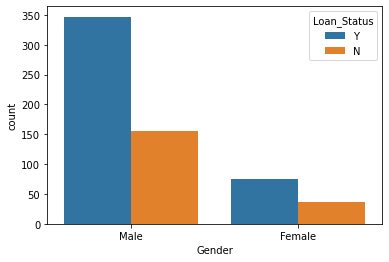

In [57]:
sns.countplot(x="Gender",hue="Loan_Status",data=train)

<AxesSubplot:xlabel='Married', ylabel='count'>

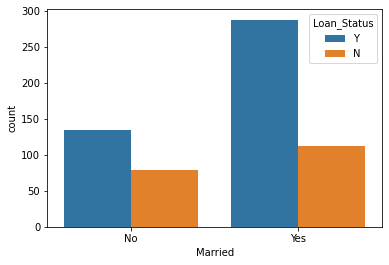

In [59]:
sns.countplot(x="Married",hue="Loan_Status",data=train)# both are object

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

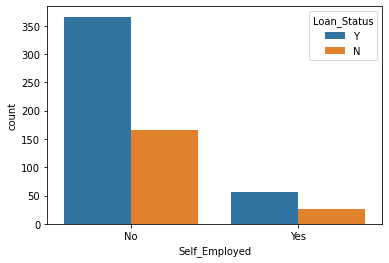

In [60]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=train)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

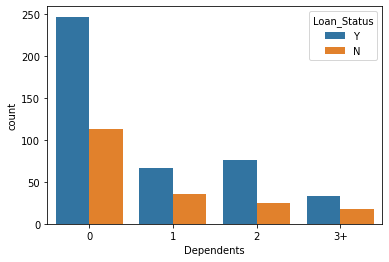

In [61]:
sns.countplot(x="Dependents",hue="Loan_Status",data=train)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

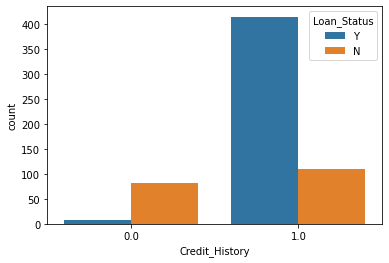

In [62]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=train)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

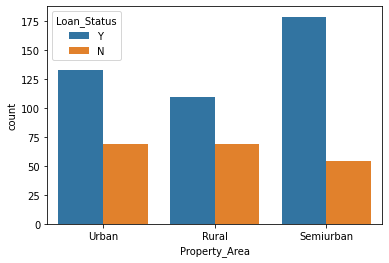

In [63]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=train)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

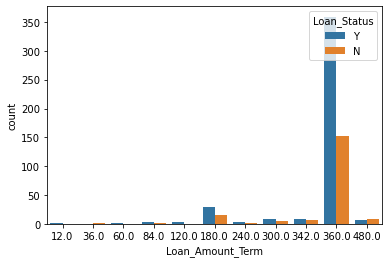

In [68]:
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=train)

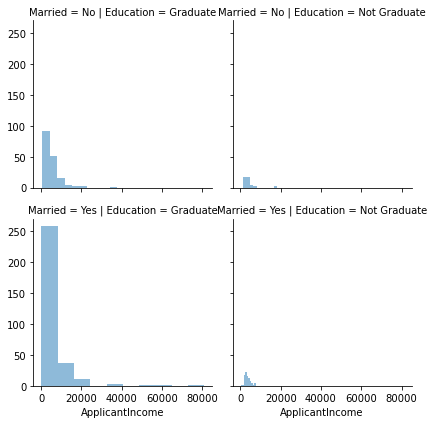

In [72]:
grid=sns.FacetGrid(train,row="Married",col="Education")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)



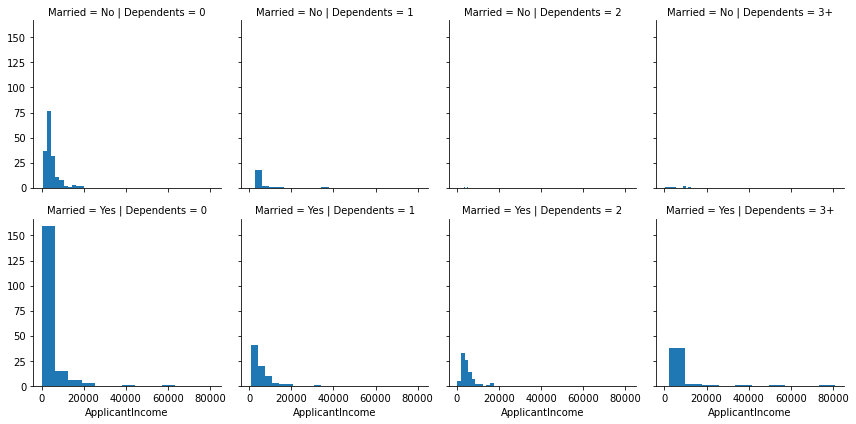

In [73]:
grid=sns.FacetGrid(train,row="Married",col="Dependents")
grid.map(plt.hist,'ApplicantIncome')


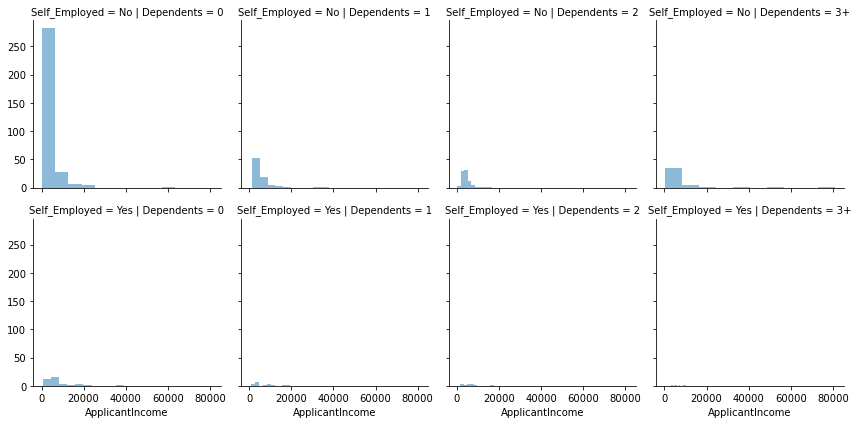

In [74]:
grid=sns.FacetGrid(train,row="Self_Employed",col="Dependents")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)


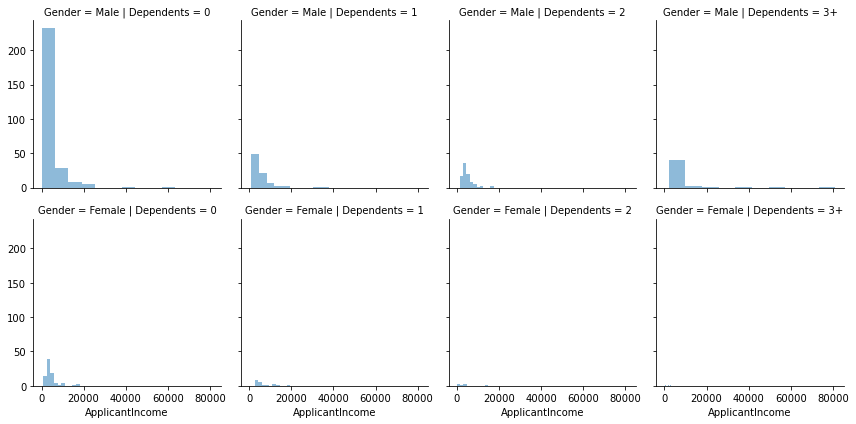

In [75]:
grid=sns.FacetGrid(train,row="Gender",col="Dependents")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)


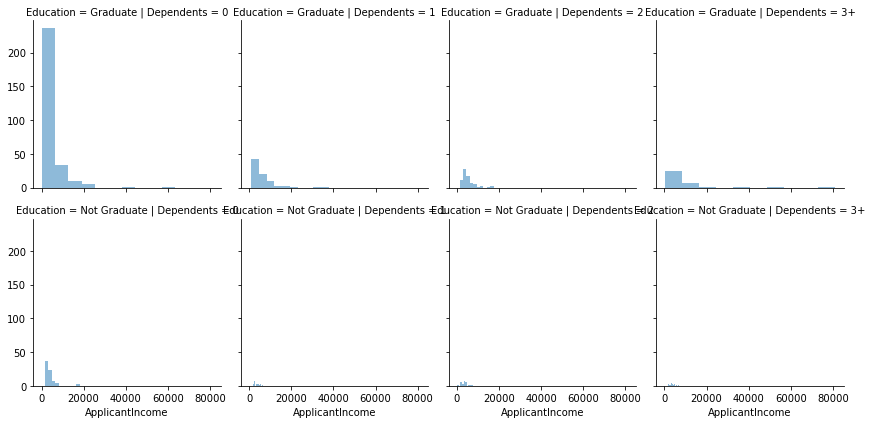

In [76]:
grid=sns.FacetGrid(train,row="Education",col="Dependents")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)


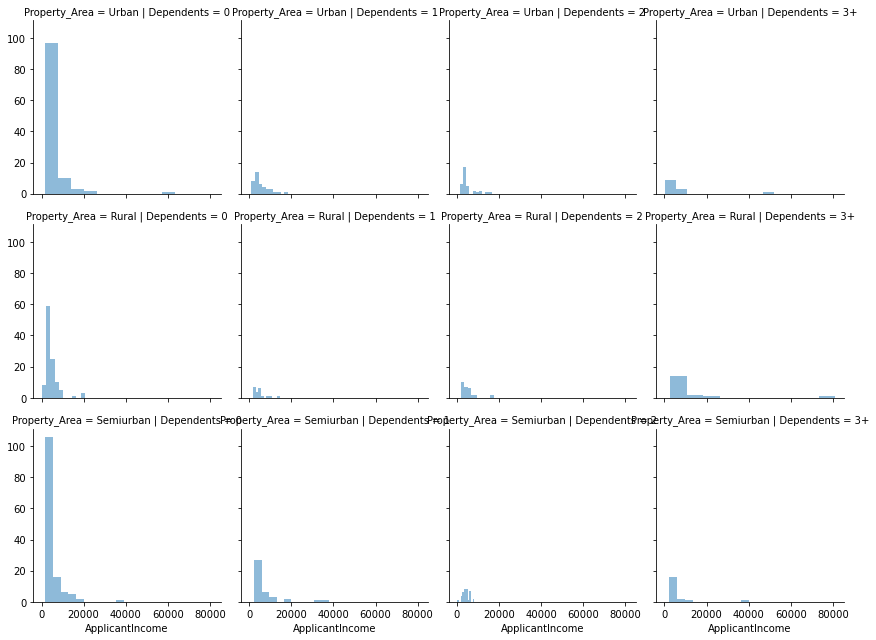

In [77]:
grid=sns.FacetGrid(train,row="Property_Area",col="Dependents")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)


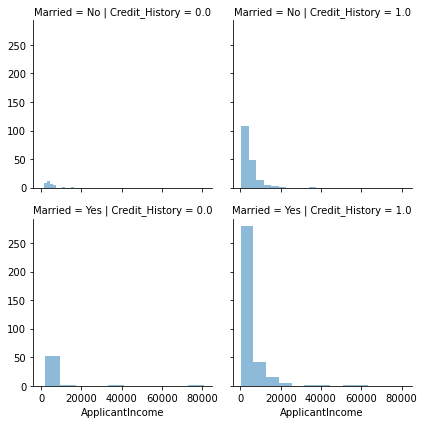

In [79]:
grid=sns.FacetGrid(train,row="Married",col="Credit_History")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)


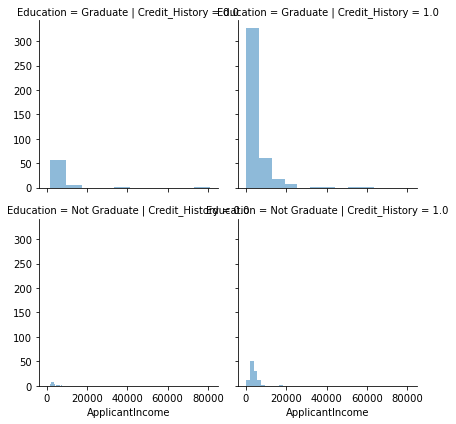

In [80]:
grid=sns.FacetGrid(train,row="Education",col="Credit_History")
grid.map(plt.hist,'ApplicantIncome',alpha=.5)


In [81]:
# Encoding to numeric data getting ready for training

In [82]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [85]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [90]:
train['Gender']=train['Gender'].map({'Male':1,'Female':2})

In [97]:
train['Married']=train['Married'].map({'Yes':1,'No':0})
train['Education']=train['Education'].map({'Graduate':1,'Not Graduate':0})
train['Self_Employed']=train['Self_Employed'].map({'Yes':1,'No':0})
train['Property_Area']=train['Property_Area'].map({'Rural':1,'Semiurban':2,'Urban':3})
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})



In [94]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,NaN,NaN,0,NaN,NaN,5849,0.0,146.412162,360.0,1.0,NaN,NaN
1,LP001003,NaN,NaN,1,NaN,NaN,4583,1508.0,128.000000,360.0,1.0,NaN,NaN
2,LP001005,NaN,NaN,0,NaN,NaN,3000,0.0,66.000000,360.0,1.0,NaN,NaN
3,LP001006,NaN,NaN,0,NaN,NaN,2583,2358.0,120.000000,360.0,1.0,NaN,NaN
4,LP001008,NaN,NaN,0,NaN,NaN,6000,0.0,141.000000,360.0,1.0,NaN,NaN
